## Import libraries

In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

c:\Project\Software\Deep-Learning-with-Keras-and-Tensorflow\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Build Model

### Defina a custom layer
Define a custom dense layer with 32 units and ReLU Activation

In [2]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

### Integrate the custom layer into a model

In [3]:
from tensorflow.keras.layers import Softmax

model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),
    Softmax() # output layer with softmax activation for multi-class classification
])

### Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary before building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)



Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
import numpy as np 

# Generate random data 
x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

# Convert labels to categorical one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3019   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2950 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2924 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2912 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2877 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2848 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2817 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2799 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2772 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2752 


### Evaluate the model

In [6]:
# Generate random test data 
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

# Convert labels to categorical one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

# Evaluate the model 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3069 
Test loss: 2.3068933486938477


## Visualize

### Visualize Model Architecture

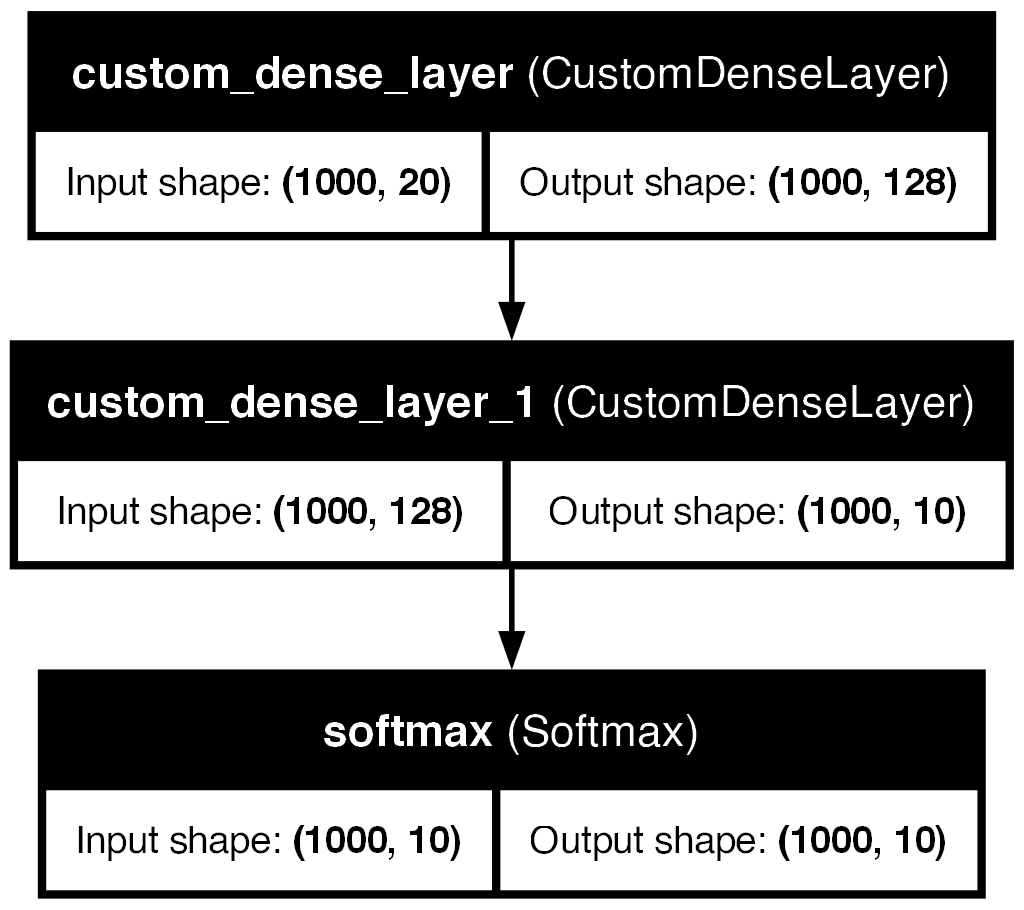

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

### Add Dropout Layer

In [13]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    CustomDenseLayer(128),
    Dropout(0.5), # dropout layer with 50% dropout rate
    CustomDenseLayer(10),
    Softmax() # output layer with softmax activation for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3038   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3007 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2974 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2949 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2944 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2968 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2945 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2934 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2936 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2885 


### Adjust the Number of Units in Custom Layer

In [14]:
class CustomDenseLayer(Layer):
    def __init__(self, units=128):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

# Integrate the new custom layer into a model
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0843   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3058 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2907 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2843 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2746 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2677 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2576 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2448 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2305 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2203 
